In [1]:
import pandas as pd


In [2]:
# Re-loading the Excel file and its sheets due to kernel interruption
file_path = '/content/Combined_Data.xlsx'
xls = pd.ExcelFile(file_path)

# Load the sheets into DataFrames
item_review_df = pd.read_excel(xls, 'Item_review')
user_review_df = pd.read_excel(xls, 'User_review')
fashion_retail_df = pd.read_excel(xls, 'Fashion_retail')

# Filtering reviews related to sustainability
sustainable_keywords = ['sustainable', 'eco', 'organic', 'recycled', 'environment']
pattern = '|'.join(sustainable_keywords)

# Extracting relevant reviews from User_review sheet
sustainable_reviews_df = user_review_df[user_review_df['review_text'].str.contains(pattern, case=False, na=False) |
                                        user_review_df['review_summary'].str.contains(pattern, case=False, na=False)]


ModuleNotFoundError: No module named 'ace_tools'

In [3]:

sustainable_reviews_df.head()


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
13,large,391778,36d,143094,142lbs,8.0,party,I ordered this dress as a replacement because ...,apple,Ordered this as a replacement dress,dress,"5' 2""",20,29.0,"October 4, 2014"
20,fit,661150,36d,900878,145lbs,10.0,wedding,I rented this dress for a spring wedding. I ha...,hourglass,Perfect for a spring wedding!,dress,"5' 5""",12,33.0,"May 23, 2017"
24,fit,862005,32c,134393,140lbs,10.0,wedding,"It fit perfectly - I have a small waist, norma...",pear,Great dress for a wedding with long ceremonies...,dress,"5' 8""",8,27.0,"June 3, 2015"


In [4]:
import pandas as pd

# Load the Excel file


# Load necessary columns from User_review sheet
user_review_df = pd.read_excel(xls, 'User_review', usecols=['review_text', 'review_summary'])

# Define keywords related to sustainability
sustainable_keywords = ['sustainable', 'eco', 'organic', 'recycled', 'environment']
pattern = '|'.join(sustainable_keywords)

# Extract relevant reviews
sustainable_reviews_df = user_review_df[user_review_df['review_text'].str.contains(pattern, case=False, na=False) |
                                        user_review_df['review_summary'].str.contains(pattern, case=False, na=False)]

# Display the filtered data
print(sustainable_reviews_df.head())

# Identify popular materials and styles (example for further analysis)
# This part is highly customizable based on specific materials and styles you want to track
materials_keywords = ['cotton', 'linen', 'hemp', 'bamboo', 'recycled polyester']
materials_pattern = '|'.join(materials_keywords)

styles_keywords = ['bohemian', 'minimalist', 'vintage', 'modern', 'classic']
styles_pattern = '|'.join(styles_keywords)

popular_materials_df = sustainable_reviews_df[sustainable_reviews_df['review_text'].str.contains(materials_pattern, case=False, na=False) |
                                              sustainable_reviews_df['review_summary'].str.contains(materials_pattern, case=False, na=False)]

popular_styles_df = sustainable_reviews_df[sustainable_reviews_df['review_text'].str.contains(styles_pattern, case=False, na=False) |
                                           sustainable_reviews_df['review_summary'].str.contains(styles_pattern, case=False, na=False)]

# Display popular materials and styles
print("Popular Materials:\n", popular_materials_df.head())
print("Popular Styles:\n", popular_styles_df.head())

# Analyze common sustainable practices
sustainable_practices_keywords = ['reuse', 'reduce', 'recycle', 'upcycle', 'ethical', 'fair trade']
practices_pattern = '|'.join(sustainable_practices_keywords)

sustainable_practices_df = sustainable_reviews_df[sustainable_reviews_df['review_text'].str.contains(practices_pattern, case=False, na=False) |
                                                  sustainable_reviews_df['review_summary'].str.contains(practices_pattern, case=False, na=False)]

# Display sustainable practices
print("Common Sustainable Practices:\n", sustainable_practices_df.head())


                                          review_text  \
3   I rented this for my company's black tie award...   
4   I have always been petite in my upper body and...   
13  I ordered this dress as a replacement because ...   
20  I rented this dress for a spring wedding. I ha...   
24  It fit perfectly - I have a small waist, norma...   

                                       review_summary  
3    Dress arrived on time and in perfect condition.   
4                     Was in love with this dress !!!  
13                Ordered this as a replacement dress  
20                      Perfect for a spring wedding!  
24  Great dress for a wedding with long ceremonies...  
Popular Materials:
                                             review_text  \
1055  I wore this to the office and to a daytime bru...   
7111  typically btwn a 2 and a 4, got the 2 based on...   
7388  I rented this to wear to a concert and loved i...   
7659  This was a cool item but didn't work for me.  ...   
9953  

In [5]:
import pandas as pd
from collections import Counter


# Load necessary columns from User_review sheet
user_review_df = pd.read_excel(xls, 'User_review', usecols=['review_text', 'review_summary'])

# Define keywords related to materials
materials_keywords = ['cotton', 'linen', 'hemp', 'bamboo', 'recycled polyester', 'silk', 'wool', 'nylon', 'polyester']
pattern = '|'.join(materials_keywords)

# Extract relevant reviews
sustainable_reviews_df = user_review_df[user_review_df['review_text'].str.contains(pattern, case=False, na=False) |
                                        user_review_df['review_summary'].str.contains(pattern, case=False, na=False)]

# Function to count keyword mentions
def count_mentions(text_series, keywords):
    counter = Counter()
    for text in text_series.dropna():
        words = text.lower().split()
        for keyword in keywords:
            if keyword in words:
                counter[keyword] += 1
    return counter

# Count mentions in review_text and review_summary
mentions_review_text = count_mentions(sustainable_reviews_df['review_text'], materials_keywords)
mentions_review_summary = count_mentions(sustainable_reviews_df['review_summary'], materials_keywords)

# Combine counts from both columns
total_mentions = mentions_review_text + mentions_review_summary

# Convert to DataFrame for better visualization
mentions_df = pd.DataFrame.from_dict(total_mentions, orient='index', columns=['count']).reset_index()
mentions_df = mentions_df.rename(columns={'index': 'material'}).sort_values(by='count', ascending=False)

# Display the results
print(mentions_df)

# Save the result to a CSV file (optional)
mentions_df.to_csv('material_mentions.csv', index=False)


    material  count
1       silk    656
0     cotton    361
2       wool    181
4      linen     71
3  polyester     69
6      nylon     16
7       hemp      3
5     bamboo      2


In [ ]:
mentions_df.head()

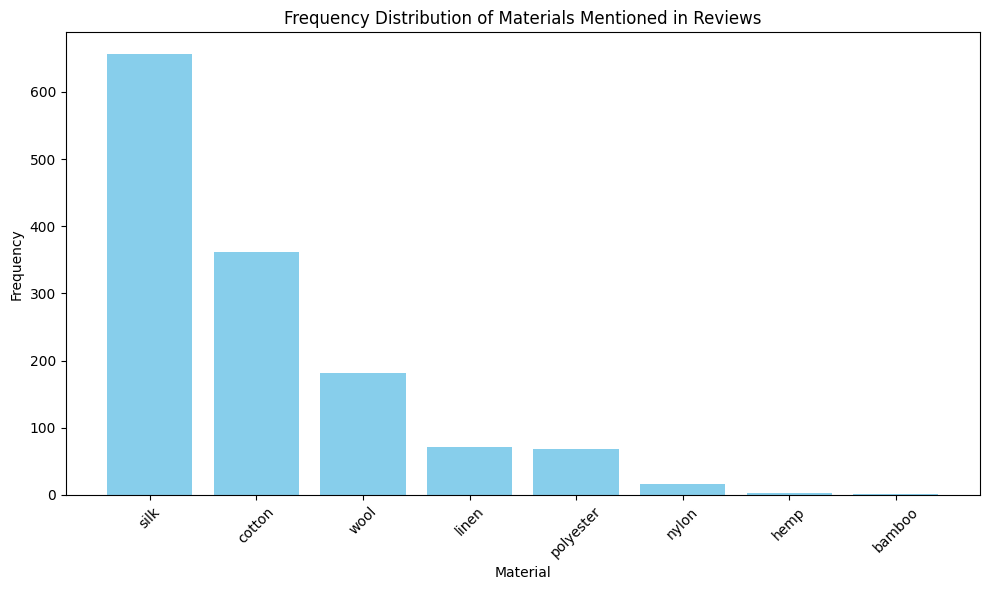

In [7]:

# Plotting the frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(mentions_df['material'], mentions_df['count'], color='skyblue')
plt.xlabel('Material')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Materials Mentioned in Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the DataFrame

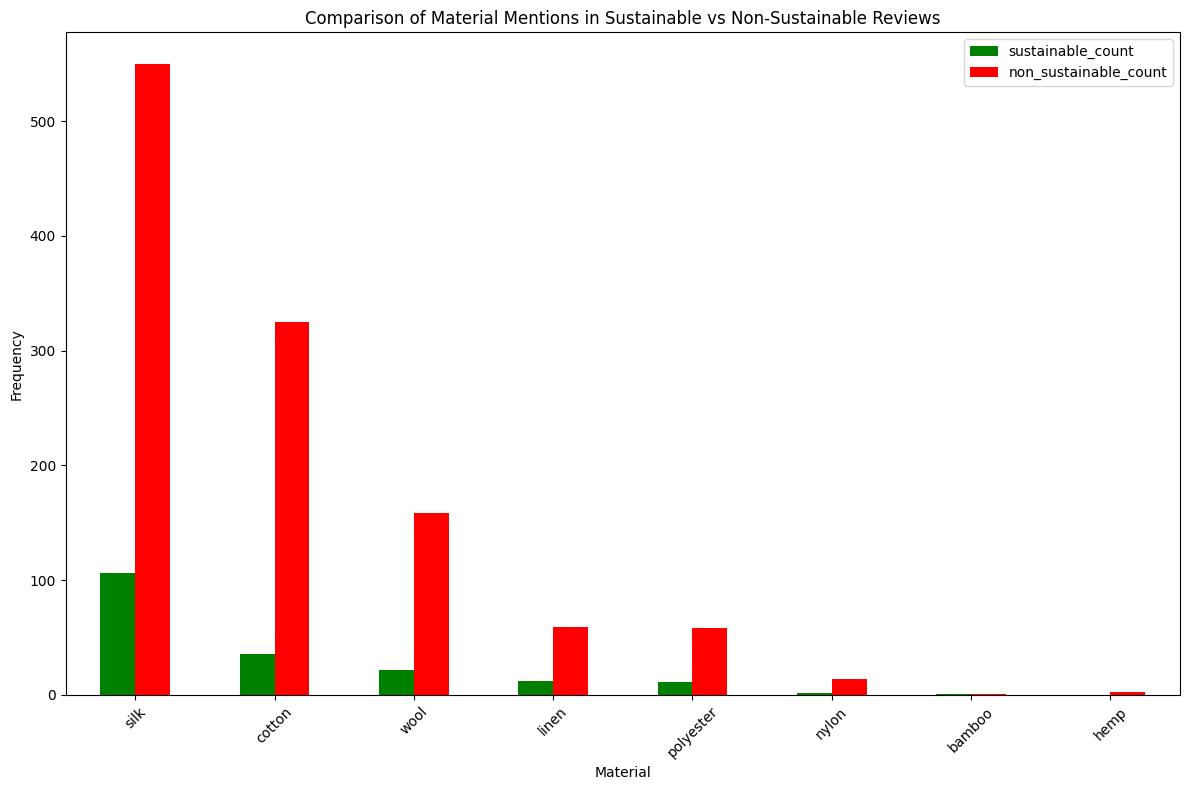

    material  sustainable_count  non_sustainable_count
0       silk              106.0                    550
1     cotton               36.0                    325
2       wool               22.0                    159
3      linen               12.0                     59
4  polyester               11.0                     58
5      nylon                2.0                     14
6     bamboo                1.0                      1
7       hemp                0.0                      3


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter



# Load necessary columns from User_review sheet
user_review_df = pd.read_excel(xls, 'User_review', usecols=['review_text', 'review_summary'])

# Define keywords related to sustainability and materials
sustainable_keywords = ['sustainable', 'eco', 'organic', 'recycled', 'environment']
materials_keywords = ['cotton', 'linen', 'hemp', 'bamboo', 'recycled polyester', 'silk', 'wool', 'nylon', 'polyester']

sustainable_pattern = '|'.join(sustainable_keywords)
materials_pattern = '|'.join(materials_keywords)

# Extract relevant reviews for sustainability
sustainable_reviews_df = user_review_df[user_review_df['review_text'].str.contains(sustainable_pattern, case=False, na=False) |
                                        user_review_df['review_summary'].str.contains(sustainable_pattern, case=False, na=False)]

# Extract relevant reviews for materials
material_reviews_df = user_review_df[user_review_df['review_text'].str.contains(materials_pattern, case=False, na=False) |
                                     user_review_df['review_summary'].str.contains(materials_pattern, case=False, na=False)]

# Function to count keyword mentions
def count_mentions(text_series, keywords):
    counter = Counter()
    for text in text_series.dropna():
        text = str(text)  # Ensure text is a string
        words = text.lower().split()
        for keyword in keywords:
            if keyword in words:
                counter[keyword] += 1
    return counter

# Count mentions in sustainable reviews
mentions_sustainable_reviews_text = count_mentions(sustainable_reviews_df['review_text'], materials_keywords)
mentions_sustainable_reviews_summary = count_mentions(sustainable_reviews_df['review_summary'], materials_keywords)

# Count mentions in non-sustainable reviews
non_sustainable_reviews_df = material_reviews_df[~material_reviews_df.index.isin(sustainable_reviews_df.index)]
mentions_non_sustainable_reviews_text = count_mentions(non_sustainable_reviews_df['review_text'], materials_keywords)
mentions_non_sustainable_reviews_summary = count_mentions(non_sustainable_reviews_df['review_summary'], materials_keywords)

# Combine counts
total_mentions_sustainable = mentions_sustainable_reviews_text + mentions_sustainable_reviews_summary
total_mentions_non_sustainable = mentions_non_sustainable_reviews_text + mentions_non_sustainable_reviews_summary

# Convert to DataFrame for better visualization
sustainable_mentions_df = pd.DataFrame.from_dict(total_mentions_sustainable, orient='index', columns=['sustainable_count']).reset_index()
sustainable_mentions_df = sustainable_mentions_df.rename(columns={'index': 'material'}).sort_values(by='sustainable_count', ascending=False)

non_sustainable_mentions_df = pd.DataFrame.from_dict(total_mentions_non_sustainable, orient='index', columns=['non_sustainable_count']).reset_index()
non_sustainable_mentions_df = non_sustainable_mentions_df.rename(columns={'index': 'material'}).sort_values(by='non_sustainable_count', ascending=False)

# Merge the DataFrames for comparison
comparison_df = pd.merge(sustainable_mentions_df, non_sustainable_mentions_df, on='material', how='outer').fillna(0)

# Plotting the frequency distribution
comparison_df.plot(kind='bar', x='material', figsize=(12, 8), color=['green', 'red'])
plt.xlabel('Material')
plt.ylabel('Frequency')
plt.title('Comparison of Material Mentions in Sustainable vs Non-Sustainable Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the comparison DataFrame
print(comparison_df)

# Save the result to a CSV file (optional)
comparison_df.to_csv('sustainable_vs_non_sustainable_mentions.csv', index=False)


In [17]:
comparison_df.head()

,material,sustainable_count,non_sustainable_count
0,silk,106.0,550
1,cotton,36.0,325
2,wool,22.0,159
3,linen,12.0,59
4,polyester,11.0,58


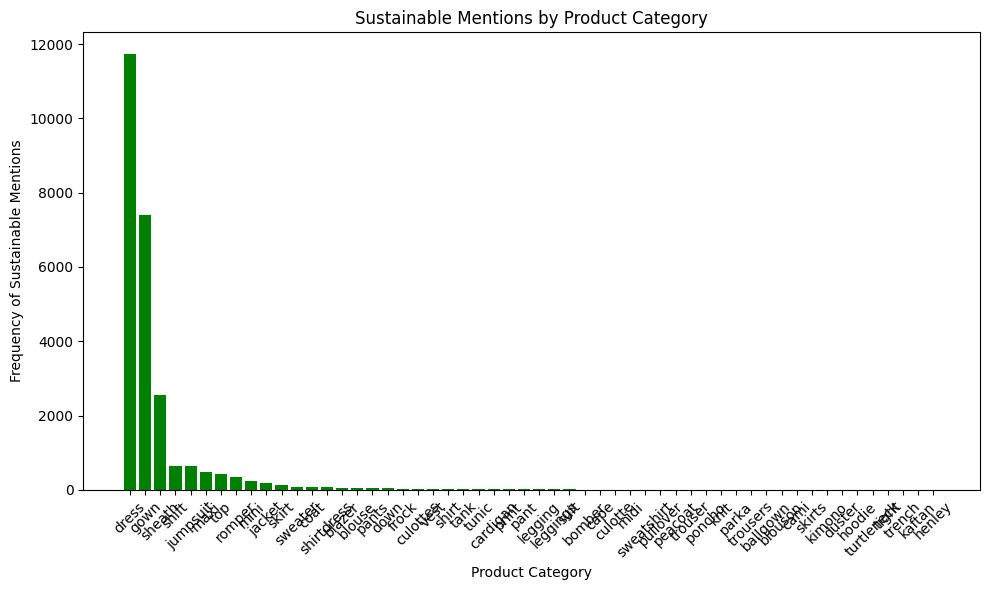

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



# Load necessary columns from User_review sheet
user_review_df = pd.read_excel(xls, 'User_review', usecols=['review_text', 'review_summary', 'category'])

# Define keywords related to sustainability
sustainable_keywords = ['sustainable', 'eco', 'organic', 'recycled', 'environment']
sustainable_pattern = '|'.join(sustainable_keywords)

# Extract relevant reviews for sustainability
sustainable_reviews_df = user_review_df[user_review_df['review_text'].str.contains(sustainable_pattern, case=False, na=False) |
                                        user_review_df['review_summary'].str.contains(sustainable_pattern, case=False, na=False)]

# Count mentions by product category
category_counts = sustainable_reviews_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Plotting the frequency distribution by category
plt.figure(figsize=(10, 6))
plt.bar(category_counts['category'], category_counts['count'], color='green')
plt.xlabel('Product Category')
plt.ylabel('Frequency of Sustainable Mentions')
plt.title('Sustainable Mentions by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the category counts DataFrame
print(category_counts)

# Save the result to a CSV file (optional)
category_counts.to_csv('sustainable_mentions_by_category.csv', index=False)


In [19]:
category_counts.head()

,category,count
0,dress,11730
1,gown,7407
2,sheath,2555
3,shift,648
4,jumpsuit,633


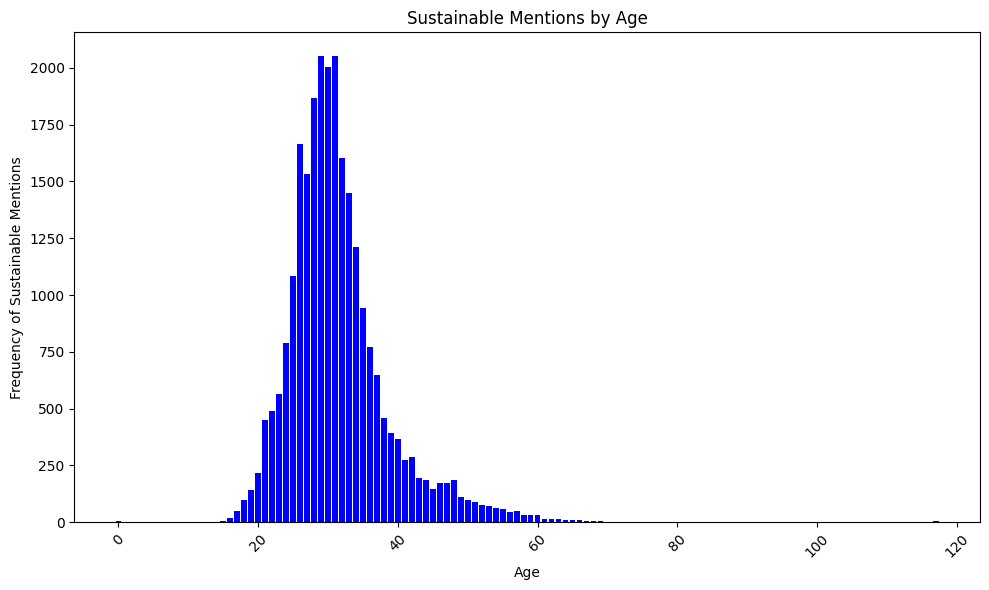

Sustainable Mentions by Age
     age  count
0   31.0   2054
1   29.0   2051
2   30.0   2004
3   28.0   1869
4   26.0   1663
..   ...    ...
57  70.0      2
58  14.0      2
59   9.0      1
60  72.0      1
61   3.0      1

[62 rows x 2 columns]


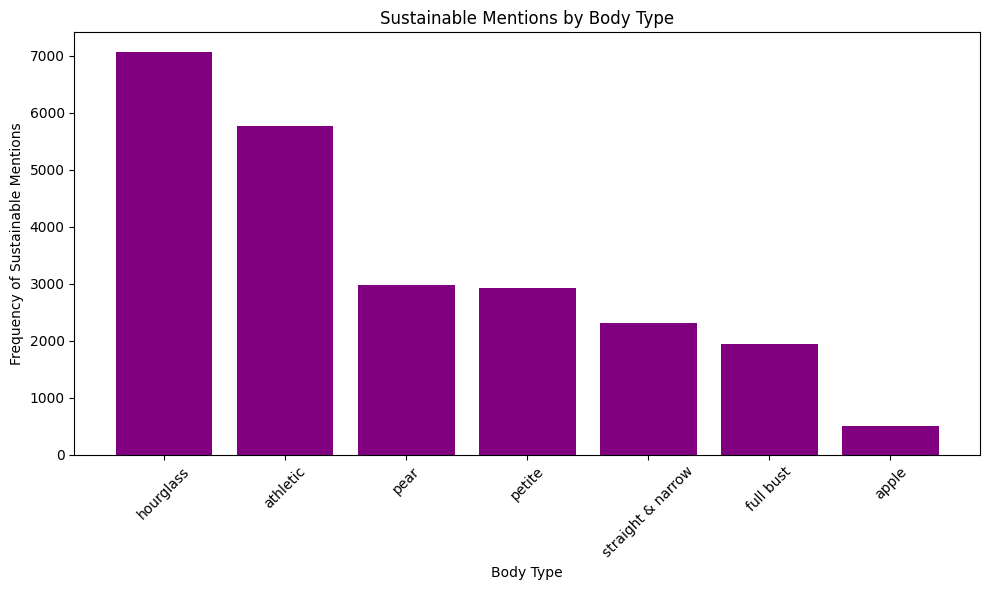

Sustainable Mentions by Body Type
           body type  count
0          hourglass   7054
1           athletic   5760
2               pear   2978
3             petite   2917
4  straight & narrow   2303
5          full bust   1943
6              apple    512


In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Load necessary columns from User_review sheet
user_review_df = pd.read_excel(xls, 'User_review', usecols=['review_text', 'review_summary', 'age', 'body type'])

# Define keywords related to sustainability
sustainable_keywords = ['sustainable', 'eco', 'organic', 'recycled', 'environment']
sustainable_pattern = '|'.join(sustainable_keywords)

# Extract relevant reviews for sustainability
sustainable_reviews_df = user_review_df[user_review_df['review_text'].str.contains(sustainable_pattern, case=False, na=False) |
                                        user_review_df['review_summary'].str.contains(sustainable_pattern, case=False, na=False)]

# Analyze by age
age_distribution = sustainable_reviews_df['age'].value_counts().reset_index()
age_distribution.columns = ['age', 'count']

# Plotting the frequency distribution by age
plt.figure(figsize=(10, 6))
plt.bar(age_distribution['age'], age_distribution['count'], color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency of Sustainable Mentions')
plt.title('Sustainable Mentions by Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the age distribution DataFrame
print("Sustainable Mentions by Age")
print(age_distribution)

# Save the result to a CSV file (optional)
age_distribution.to_csv('sustainable_mentions_by_age.csv', index=False)

# Analyze by body type
body_type_distribution = sustainable_reviews_df['body type'].value_counts().reset_index()
body_type_distribution.columns = ['body type', 'count']

# Plotting the frequency distribution by body type
plt.figure(figsize=(10, 6))
plt.bar(body_type_distribution['body type'], body_type_distribution['count'], color='purple')
plt.xlabel('Body Type')
plt.ylabel('Frequency of Sustainable Mentions')
plt.title('Sustainable Mentions by Body Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the body type distribution DataFrame
print("Sustainable Mentions by Body Type")
print(body_type_distribution)

# Save the result to a CSV file (optional)
body_type_distribution.to_csv('sustainable_mentions_by_body_type.csv', index=False)


In [21]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the Excel file

# Load necessary columns from the sheets
item_review_df = pd.read_excel(xls, 'Item_review', usecols=['review_summary', 'review_text', 'user_id'])
user_review_df = pd.read_excel(xls, 'User_review', usecols=['review_text', 'review_summary', 'user_id'])
fashion_retail_df = pd.read_excel(xls, 'Fashion_retail', usecols=['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)', 'Review Rating', 'Payment Method'])

# Define keywords related to sustainability
sustainable_keywords = ['sustainable', 'eco', 'organic', 'recycled', 'environment']
sustainable_pattern = '|'.join(sustainable_keywords)

# Filter sustainable reviews from both sheets
sustainable_reviews_item = item_review_df[item_review_df['review_text'].str.contains(sustainable_pattern, case=False, na=False) |
                                          item_review_df['review_summary'].str.contains(sustainable_pattern, case=False, na=False)]
sustainable_reviews_user = user_review_df[user_review_df['review_text'].str.contains(sustainable_pattern, case=False, na=False) |
                                          user_review_df['review_summary'].str.contains(sustainable_pattern, case=False, na=False)]

# Combine sustainable reviews
sustainable_reviews = pd.concat([sustainable_reviews_item, sustainable_reviews_user])

# Display the combined sustainable reviews
sustainable_reviews.head()


,user_id,review_summary,review_text
6758,61073,This dress is so amazing.,This dress is so amazing. It has just the perf...
6783,745829,This has become one of my,This has become one of my favorite dresses. So...
6794,721331,According to the size cha,According to the size chart I should have orde...
6830,260379,I am just getting to the,I am just getting to the age of the Real Job I...
6832,381680,I feel absolutely gorgeou,I feel absolutely gorgeous in this dress. I bo...


In [22]:
# Function to analyze sentiment
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

# Apply sentiment analysis
sustainable_reviews['sentiment'] = sustainable_reviews['review_text'].apply(get_sentiment)

# Display sentiment analysis results
sustainable_reviews[['review_text', 'sentiment']].head()


,review_text,sentiment
6758,This dress is so amazing. It has just the perf...,0.433333
6783,This has become one of my favorite dresses. So...,0.475000
6794,According to the size chart I should have orde...,0.074603
6830,I am just getting to the age of the Real Job I...,0.089400
6832,I feel absolutely gorgeous in this dress. I bo...,0.110897


In [23]:
# Rename columns for merging
sustainable_reviews = sustainable_reviews.rename(columns={'user_id': 'Customer Reference ID'})

# Merge sustainable reviews with fashion retail data
merged_df = pd.merge(sustainable_reviews, fashion_retail_df, on='Customer Reference ID', how='inner')

# Display the merged DataFrame
merged_df.head()


,Customer Reference ID,review_summary,review_text,sentiment,Item Purchased,Purchase Amount (USD),Review Rating,Payment Method
0,3997,Super fun and SO many compliments!,I wore this dress for a rehearsal and rehearsa...,0.239821,Wallet,3003.0,4.7,Cash
1,3997,Super fun and SO many compliments!,I wore this dress for a rehearsal and rehearsa...,0.239821,Slippers,NaN,NaN,Credit Card
2,3997,Super fun and SO many compliments!,I wore this dress for a rehearsal and rehearsa...,0.239821,Camisole,NaN,2.1,Credit Card
3,3997,Super fun and SO many compliments!,I wore this dress for a rehearsal and rehearsa...,0.239821,Belt,28.0,4.4,Credit Card
4,3997,Super fun and SO many compliments!,I wore this dress for a rehearsal and rehearsa...,0.239821,Backpack,44.0,4.8,Credit Card


   Customer Reference ID  total_purchases  sustainable_purchases  \
0                   3957               14                      0   
1                   3958               20                      0   
2                   3959               22                      0   
3                   3960               18                      0   
4                   3961               22                      0   

   sustainable_percentage  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  


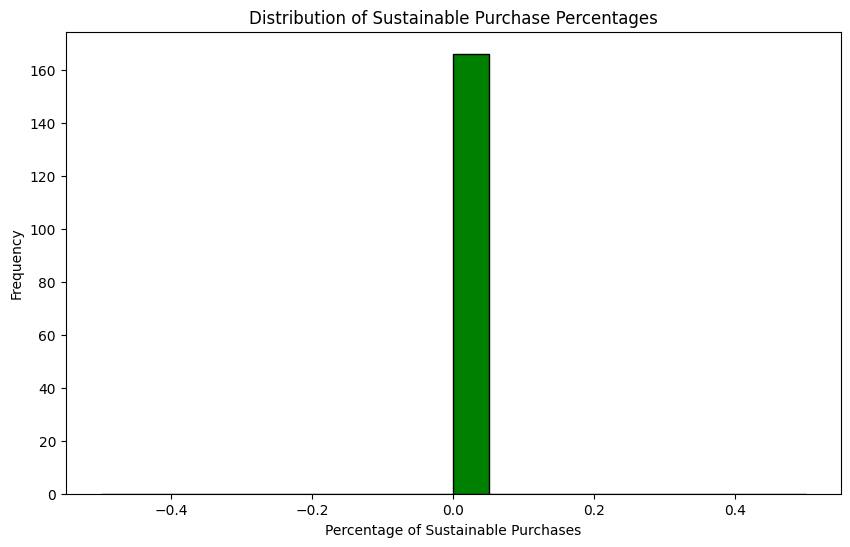

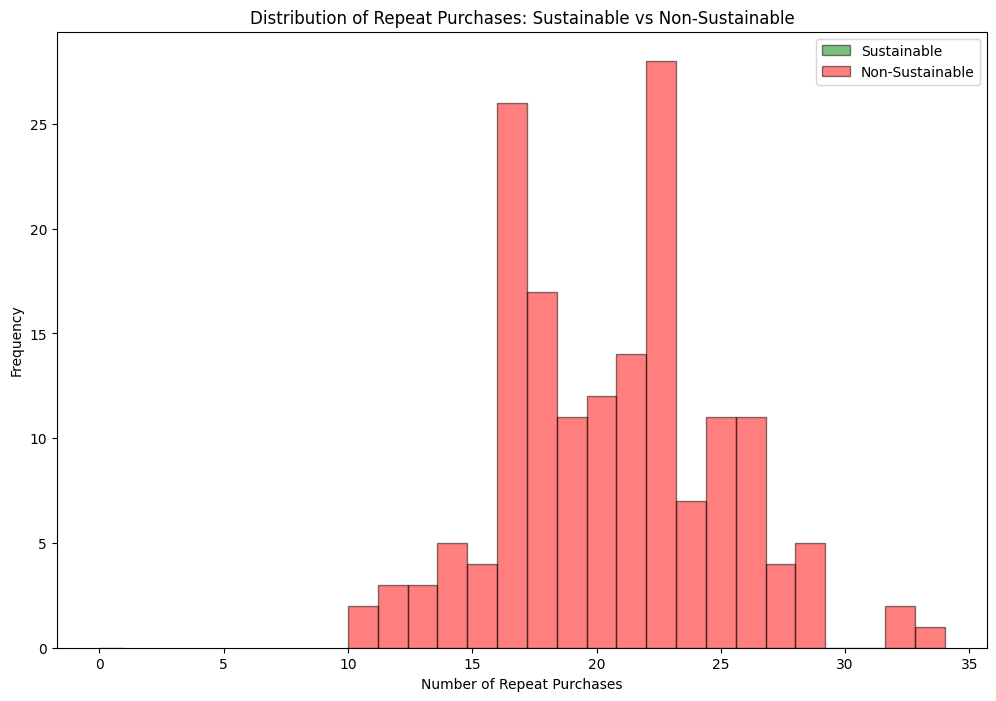

In [24]:
import pandas as pd
import matplotlib.pyplot as plt



# Load necessary columns from the sheets
user_review_df = pd.read_excel(xls, 'User_review', usecols=['review_text', 'review_summary', 'user_id', 'item_id'])
fashion_retail_df = pd.read_excel(xls, 'Fashion_retail', usecols=['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)', 'Date Purchase', 'Review Rating'])

# Define keywords related to sustainability
sustainable_keywords = ['sustainable', 'eco', 'organic', 'recycled', 'environment']
sustainable_pattern = '|'.join(sustainable_keywords)

# Filter sustainable reviews
sustainable_reviews = user_review_df[user_review_df['review_text'].str.contains(sustainable_pattern, case=False, na=False) |
                                     user_review_df['review_summary'].str.contains(sustainable_pattern, case=False, na=False)]

# Get item IDs of sustainable items
sustainable_item_ids = sustainable_reviews['item_id'].unique()

# Mark items as sustainable or not
fashion_retail_df['is_sustainable'] = fashion_retail_df['Item Purchased'].isin(sustainable_item_ids)

# Count repeat purchases for sustainable and non-sustainable items
repeat_purchases = fashion_retail_df.groupby(['Customer Reference ID', 'is_sustainable']).size().reset_index(name='purchase_count')

# Calculate loyalty metrics
loyalty_metrics = repeat_purchases.groupby('Customer Reference ID').agg(
    total_purchases=pd.NamedAgg(column='purchase_count', aggfunc='sum'),
    sustainable_purchases=pd.NamedAgg(column='purchase_count', aggfunc=lambda x: x[repeat_purchases['is_sustainable']].sum())
).reset_index()

# Add percentage of sustainable purchases
loyalty_metrics['sustainable_percentage'] = (loyalty_metrics['sustainable_purchases'] / loyalty_metrics['total_purchases']) * 100

# Display loyalty metrics
print(loyalty_metrics.head())

# Visualize the distribution of sustainable purchase percentages
plt.figure(figsize=(10, 6))
plt.hist(loyalty_metrics['sustainable_percentage'], bins=20, color='green', edgecolor='black')
plt.xlabel('Percentage of Sustainable Purchases')
plt.ylabel('Frequency')
plt.title('Distribution of Sustainable Purchase Percentages')
plt.show()

# Visualize repeat purchase behavior
sustainable_repeat = repeat_purchases[repeat_purchases['is_sustainable']]
non_sustainable_repeat = repeat_purchases[~repeat_purchases['is_sustainable']]

plt.figure(figsize=(12, 8))
plt.hist(non_sustainable_repeat['purchase_count'], bins=20, alpha=0.5, label='Non-Sustainable', color='red', edgecolor='black')
plt.xlabel('Number of Repeat Purchases')
plt.ylabel('Frequency')
plt.title('Distribution of Repeat Purchases:  Non-Sustainable')
plt.legend()
plt.show()


In [32]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the Excel file
file_path = '/content/drive/MyDrive/Combined_Data.xlsx'
xls = pd.ExcelFile(file_path)

# Load necessary columns from the sheets
data_df = pd.read_excel(xls, 'UK_brand_data')

# Define keywords related to sustainable fashion
sustainable_keywords = ['sustainable', 'eco', 'organic', 'recycled', 'environment']
sustainable_pattern = '|'.join(sustainable_keywords)

# Filter sustainable reviews
sustainable_reviews = data_df[data_df['Description'].str.contains(sustainable_pattern, case=False, na=False) |
                              data_df['Social Media Comments'].str.contains(sustainable_pattern, case=False, na=False)]

# Identify popular materials, styles, and practices
materials = sustainable_reviews['Style Attributes'].value_counts()
styles = sustainable_reviews['Category'].value_counts()
practices = sustainable_reviews['feedback'].value_counts()

# Display the results
print("Popular Materials:\n", materials)
print("\nPopular Styles:\n", styles)
print("\nPopular Practices:\n", practices)

# Word cloud for popular materials and styles
text = ' '.join(sustainable_reviews['Style Attributes'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Materials and Styles in Sustainable Fashion')
plt.show()


Popular Materials:
 Series([], Name: count, dtype: int64)

Popular Styles:
 Series([], Name: count, dtype: int64)

Popular Practices:
 Series([], Name: count, dtype: int64)


ValueError: We need at least 1 word to plot a word cloud, got 0.

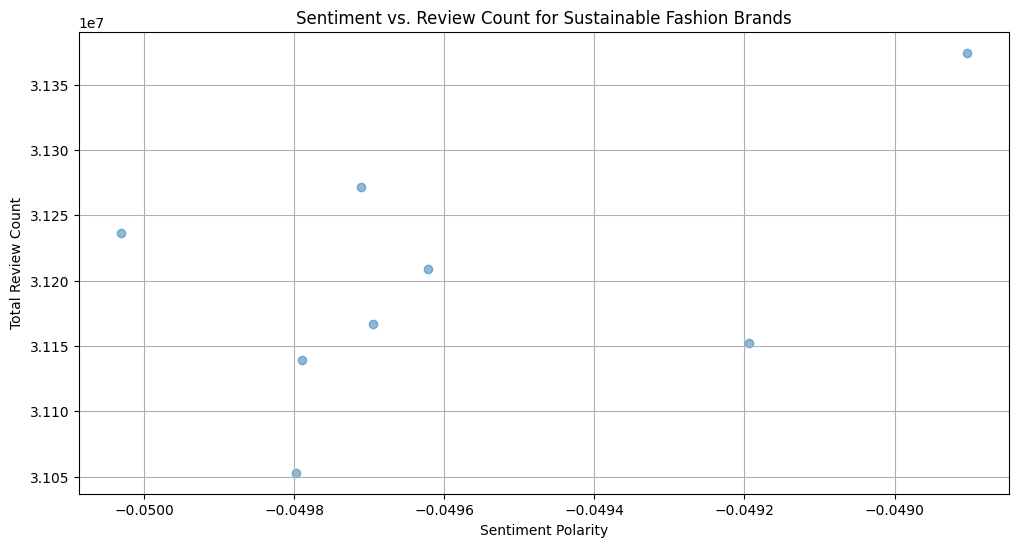

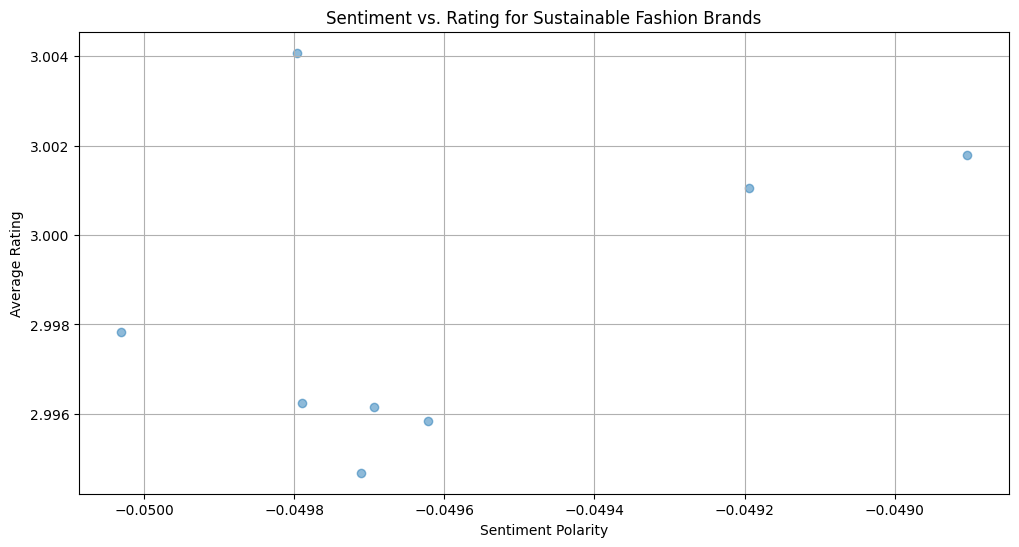

In [35]:
# Sentiment Analysis on Social Media Comments
from textblob import TextBlob

# Function to analyze sentiment
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

# Apply sentiment analysis
data_df['sentiment'] = data_df['Social Media Comments'].apply(get_sentiment)

# Correlation between sentiment and popularity
popularity = data_df.groupby('Brand').agg({
    'sentiment': 'mean',
    'Review Count': 'sum',
    'Rating': 'mean'
}).reset_index()

# Visualize the relationship between sentiment and review count
plt.figure(figsize=(12, 6))
plt.scatter(popularity['sentiment'], popularity['Review Count'], alpha=0.5)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Total Review Count')
plt.title('Sentiment vs. Review Count for Sustainable Fashion Brands')
plt.grid(True)
plt.show()

# Visualize the relationship between sentiment and rating
plt.figure(figsize=(12, 6))
plt.scatter(popularity['sentiment'], popularity['Rating'], alpha=0.5)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Average Rating')
plt.title('Sentiment vs. Rating for Sustainable Fashion Brands')
plt.grid(True)
plt.show()



Engagement Rates by Age:
     Age  Review Count    Rating  sentiment
0    18       5281867  2.996537  -0.049763
1    19       5276799  2.991866  -0.050216
2    20       5291104  2.993276  -0.048389
3    21       5296189  2.998248  -0.050350
4    22       5294075  2.994613  -0.051544
5    23       5291504  3.005887  -0.050545
6    24       5352198  2.992099  -0.052159
7    25       5286554  3.007877  -0.048730
8    26       5324792  3.010940  -0.051122
9    27       5326242  2.995362  -0.049728
10   28       5313148  2.996880  -0.049128
11   29       5348259  2.991913  -0.047838
12   30       5377443  3.005378  -0.050138
13   31       5338876  2.992550  -0.048741
14   32       5317771  3.004866  -0.051964
15   33       5344067  3.001090  -0.048447
16   34       5347371  2.991565  -0.050482
17   35       5251979  2.995258  -0.049292
18   36       5243043  3.002400  -0.049247
19   37       5356216  3.007895  -0.050478
20   38       5317073  3.007599  -0.050959
21   39       5322127  3.00

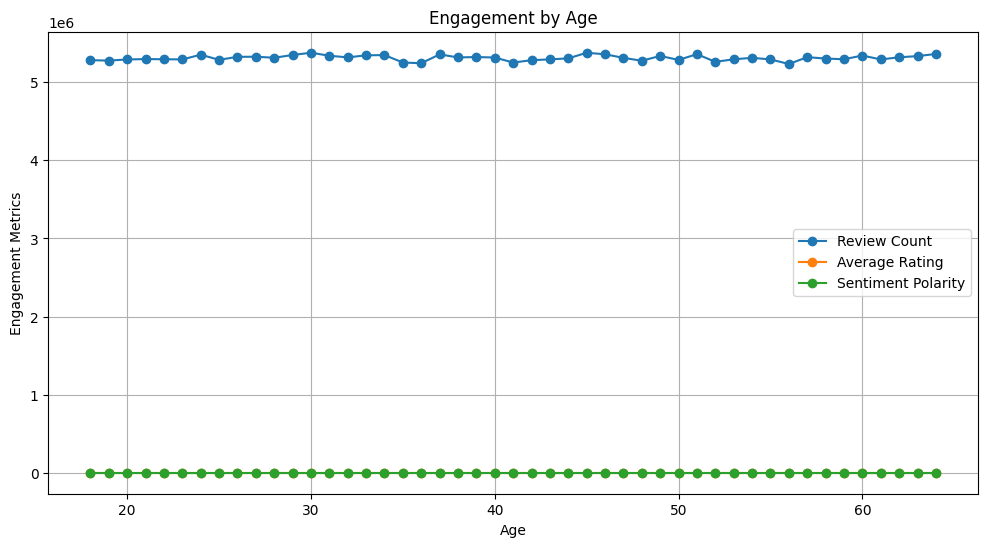

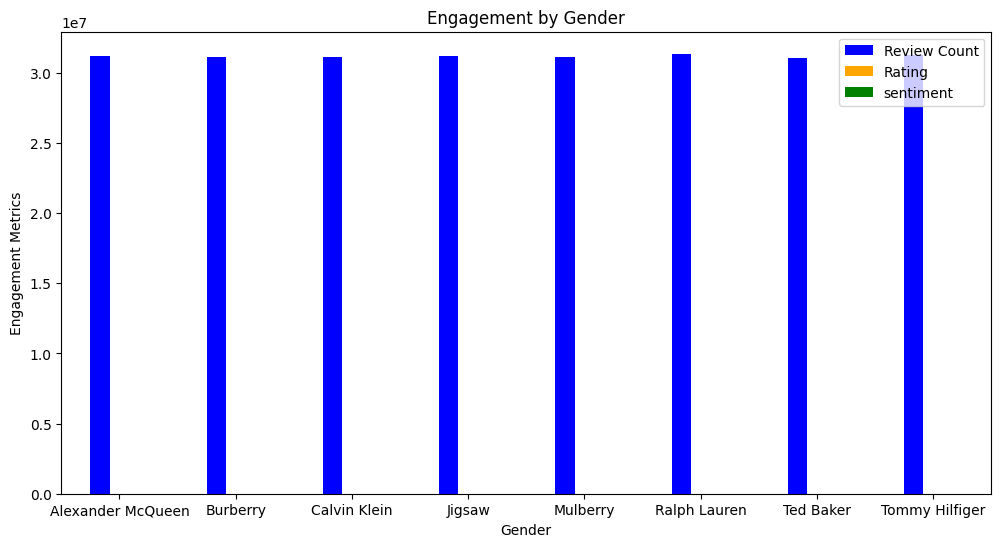

In [36]:
# Analyze engagement rates by demographic factors
def calculate_engagement_rate(df, group_by_col):
    grouped_df = df.groupby(group_by_col).agg({
        'Review Count': 'sum',
        'Rating': 'mean',
        'sentiment': 'mean'
    }).reset_index()
    return grouped_df

# Engagement rates by age
age_engagement = calculate_engagement_rate(data_df, 'Age')
print("\nEngagement Rates by Age:\n", age_engagement)

# Engagement rates by gender
gender_engagement = calculate_engagement_rate(data_df, 'Brand')  # Assuming Brand represents gender in this context
print("\nEngagement Rates by Gender:\n", gender_engagement)

# Visualize engagement by age
plt.figure(figsize=(12, 6))
plt.plot(age_engagement['Age'], age_engagement['Review Count'], marker='o', label='Review Count')
plt.plot(age_engagement['Age'], age_engagement['Rating'], marker='o', label='Average Rating')
plt.plot(age_engagement['Age'], age_engagement['sentiment'], marker='o', label='Sentiment Polarity')
plt.xlabel('Age')
plt.ylabel('Engagement Metrics')
plt.title('Engagement by Age')
plt.legend()
plt.grid(True)
plt.show()

# Visualize engagement by gender
gender_engagement.plot(kind='bar', x='Brand', figsize=(12, 6), color=['blue', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Engagement Metrics')
plt.title('Engagement by Gender')
plt.xticks(rotation=0)
plt.show()


In [40]:
# Function to analyze sentiment
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

# Apply sentiment analysis to social media comments
data_df['sentiment'] = data_df['Social Media Comments'].apply(get_sentiment)

# Display the sentiment analysis results
data_df[['Social Media Comments', 'sentiment']].head()



,Social Media Comments,sentiment
0,Mixed,0.000
1,Neutral,0.000
2,Negative,-0.300
3,Other,-0.125
4,Mixed,0.000


In [41]:
# Group data by brand and calculate average sentiment, total review count, and average rating
brand_sentiment = data_df.groupby('Brand').agg({
    'sentiment': 'mean',
    'Review Count': 'sum',
    'Rating': 'mean'
}).reset_index()

# Display the aggregated data
print(brand_sentiment)

# Correlation between sentiment and review count
correlation_review_count = brand_sentiment['sentiment'].corr(brand_sentiment['Review Count'])
print(f'Correlation between sentiment and review count: {correlation_review_count}')

# Correlation between sentiment and rating
correlation_rating = brand_sentiment['sentiment'].corr(brand_sentiment['Rating'])
print(f'Correlation between sentiment and rating: {correlation_rating}')


               Brand  sentiment  Review Count    Rating
0  Alexander McQueen  -0.050030      31236512  2.997839
1           Burberry  -0.049694      31166571  2.996150
2       Calvin Klein  -0.049194      31152396  3.001044
3             Jigsaw  -0.049621      31208649  2.995833
4           Mulberry  -0.049790      31139142  2.996242
5       Ralph Lauren  -0.048904      31374326  3.001783
6          Ted Baker  -0.049797      31052965  3.004080
7     Tommy Hilfiger  -0.049711      31271870  2.994681
Correlation between sentiment and review count: 0.49269357939219693
Correlation between sentiment and rating: 0.41840576362947296


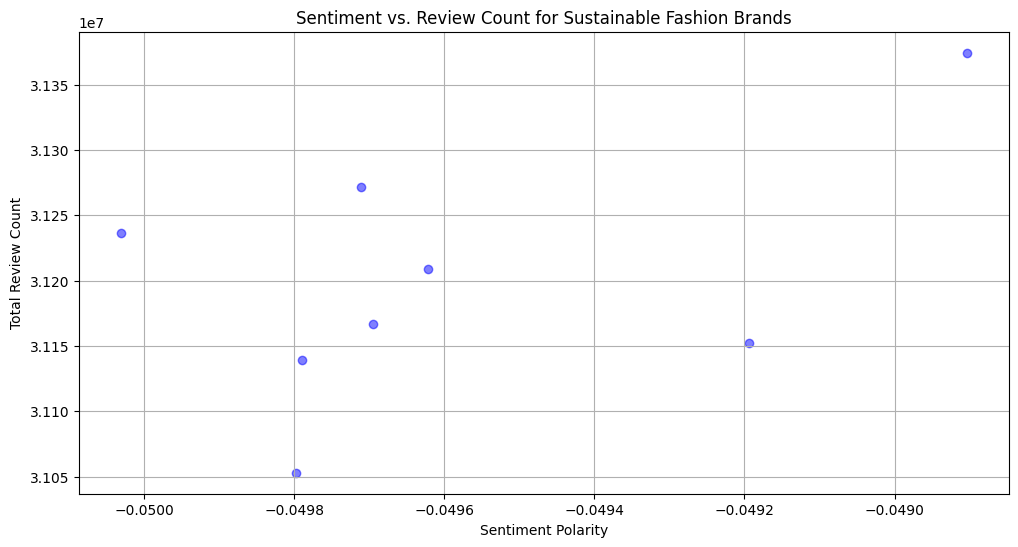

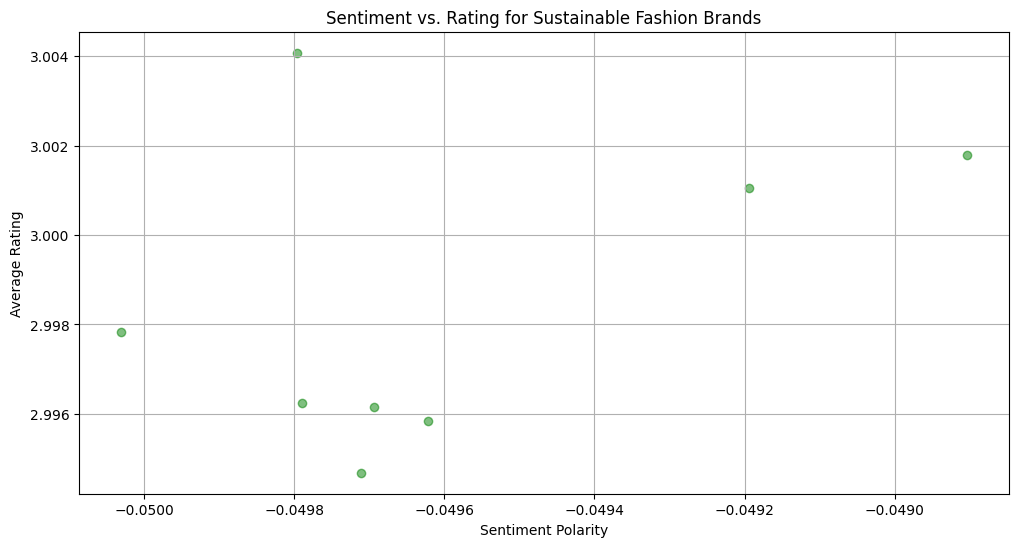

In [42]:
# Visualize the relationship between sentiment and review count
plt.figure(figsize=(12, 6))
plt.scatter(brand_sentiment['sentiment'], brand_sentiment['Review Count'], alpha=0.5, color='blue')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Total Review Count')
plt.title('Sentiment vs. Review Count for Sustainable Fashion Brands')
plt.grid(True)
plt.show()

# Visualize the relationship between sentiment and rating
plt.figure(figsize=(12, 6))
plt.scatter(brand_sentiment['sentiment'], brand_sentiment['Rating'], alpha=0.5, color='green')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Average Rating')
plt.title('Sentiment vs. Rating for Sustainable Fashion Brands')
plt.grid(True)
plt.show()


In [43]:
# Filter out necessary columns
season_reviews_df = data_df[['Season', 'Rating', 'Review Count']]

# Group by season and calculate average rating and total review count
seasonal_metrics = season_reviews_df.groupby('Season').agg({
    'Rating': 'mean',
    'Review Count': 'sum'
}).reset_index()

# Display the aggregated data
print(seasonal_metrics)


          Season    Rating  Review Count
0           Fall  2.992157      41686744
1    Fall/Winter  3.001432      41592779
2         Spring  2.998440      41597477
3  Spring/Summer  2.998514      41559884
4         Summer  3.003637      41461895
5         Winter  2.996592      41703652


In [44]:
# Calculate the percentage of reviews for each season
total_reviews = season_reviews_df['Review Count'].sum()
seasonal_metrics['Review Percentage'] = (seasonal_metrics['Review Count'] / total_reviews) * 100

# Display the calculated metrics
print(seasonal_metrics)


          Season    Rating  Review Count  Review Percentage
0           Fall  2.992157      41686744          16.701257
1    Fall/Winter  3.001432      41592779          16.663611
2         Spring  2.998440      41597477          16.665494
3  Spring/Summer  2.998514      41559884          16.650432
4         Summer  3.003637      41461895          16.611174
5         Winter  2.996592      41703652          16.708031


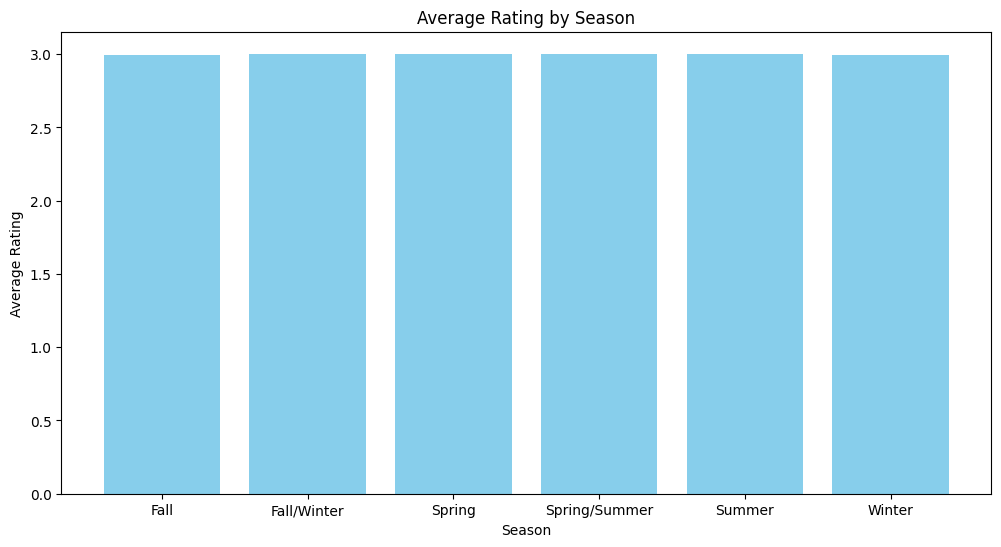

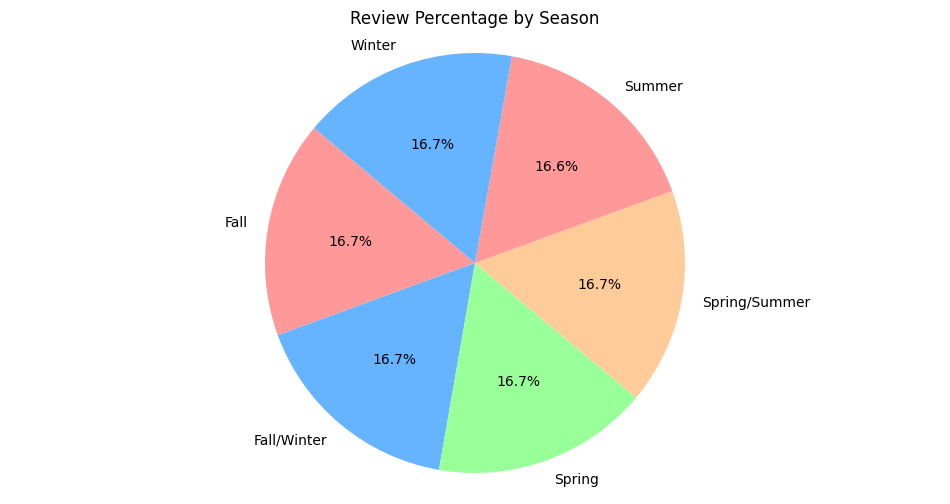

In [52]:
import matplotlib.pyplot as plt

# Plot average rating by season
plt.figure(figsize=(12, 6))
plt.bar(seasonal_metrics['Season'], seasonal_metrics['Rating'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Rating by Season')
plt.show()


# Plot review percentage by season
plt.figure(figsize=(12, 6))
plt.pie(seasonal_metrics['Review Percentage'], labels=seasonal_metrics['Season'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axis('equal')
plt.title('Review Percentage by Season')
plt.show()


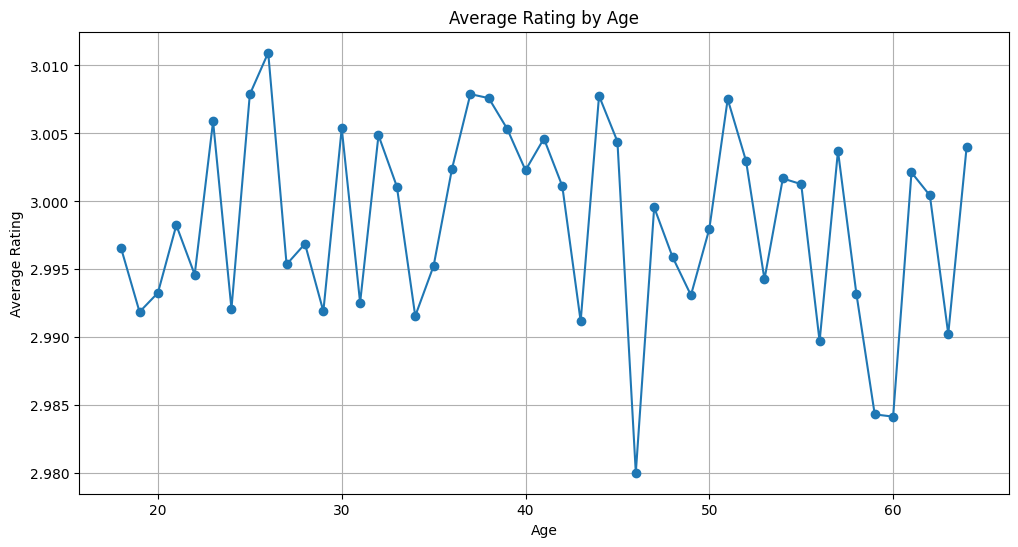

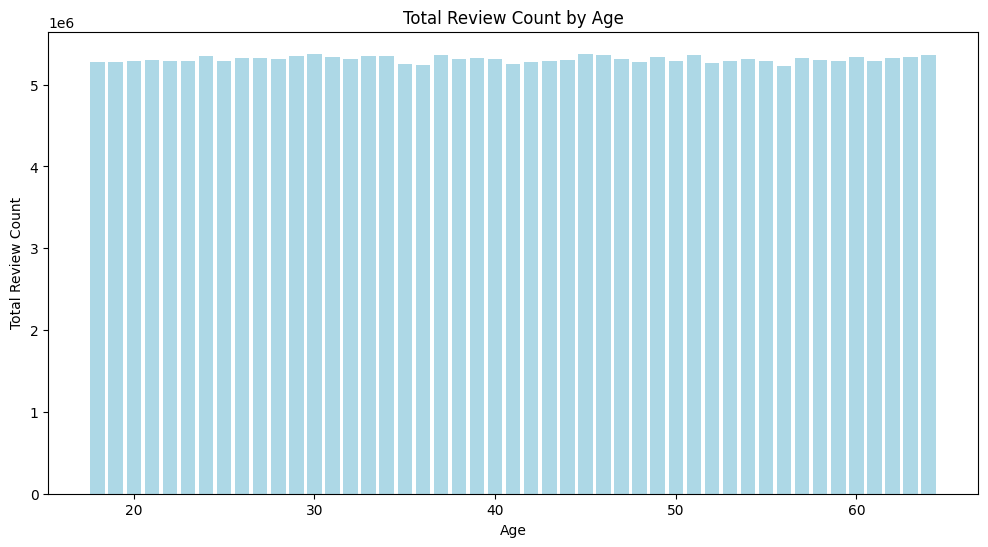

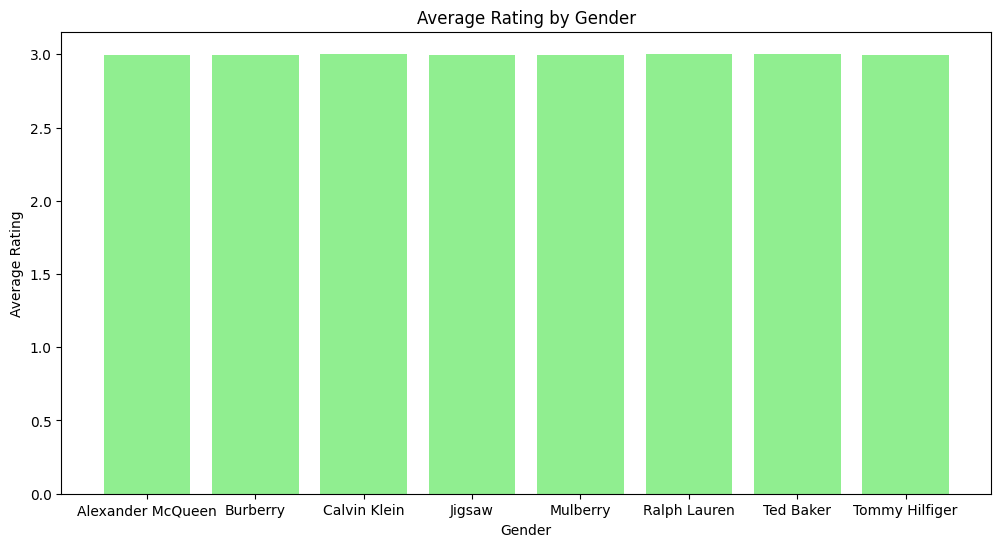

In [51]:
import matplotlib.pyplot as plt

# Plot average rating by age
plt.figure(figsize=(12, 6))
plt.plot(age_metrics['Age'], age_metrics['Rating'], marker='o', label='Average Rating')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Average Rating by Age')
plt.grid(True)
plt.show()

# Plot review count by age
plt.figure(figsize=(12, 6))
plt.bar(age_metrics['Age'], age_metrics['Review Count'], color='lightblue')
plt.xlabel('Age')
plt.ylabel('Total Review Count')
plt.title('Total Review Count by Age')
plt.show()

# Plot average rating by gender
plt.figure(figsize=(12, 6))
plt.bar(gender_metrics['Brand'], gender_metrics['Rating'], color='lightgreen')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.title('Average Rating by Gender')
plt.show()


In [49]:
# Analyze review metrics by purchase history
purchase_history_metrics = data_df.groupby('Purchase History').agg({
    'Rating': 'mean',
    'Review Count': 'sum'
}).reset_index()

# Display the aggregated data
print("Review Metrics by Purchase History:\n", purchase_history_metrics)


Review Metrics by Purchase History:
   Purchase History    Rating  Review Count
0    Above Average  2.999457      25089716
1          Average  3.002609      24892336
2    Below Average  3.003931      24878064
3             High  2.998025      24959646
4              Low  3.001847      25037740
5           Medium  2.994813      24908790
6       Negligible  2.994973      25000645
7      Significant  2.993407      24831735
8        Very High  2.998455      24892949
9         Very Low  2.997009      25110810
